In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('C:\\Users\\Pc\\Desktop\\GoMyCode\\titanic-passengers.csv', sep=';',encoding='unicode_escape')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [2]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
print(data.isnull())
print(data.isnull().sum())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False   True  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [5]:
data['Age'].isnull()
data['Age'].isnull().sum()


177

In [6]:
data['Age']=data['Age'].replace(np.NaN, data['Age'].mean())
data['Age'].isnull().sum()

0

In [7]:
data['Embarked']=data['Embarked'].dropna()
data['Embarked'].isnull().sum()

2

In [8]:
data['Cabin']=data['Cabin'].replace(np.NaN, data['Cabin'].mode()[0])
data['Cabin']


0      B96 B98
1        F G73
2      B96 B98
3      B96 B98
4          B71
        ...   
886    B96 B98
887    B96 B98
888    B96 B98
889    B96 B98
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [9]:
data['Cabin'].isnull().sum()

0

# Age distribution

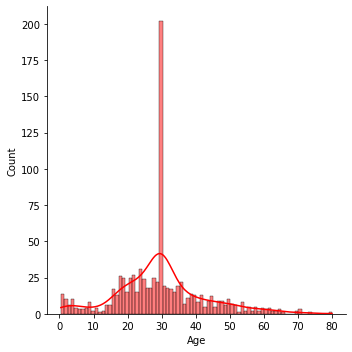

In [10]:
sns.displot(data["Age"], bins=80, kde=True, color='red')

From the histogram above, we can conlude that most passengers in the Titanic were from 20 to 40.

# correlation etween sex and age

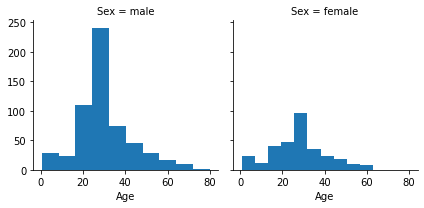

In [10]:
#sns.catplot(data['Survived'],data=df,kind='count',palette='summer',hue=0)g = sns.FacetGrid(data=titanic, col='sex')
g = sns.FacetGrid(data=data, col='Sex')
g.map(plt.hist, 'Age')


from the histogram above it can be concluded that males were much more than female and that most passengers were from 20 to 40. 

# Importance of sex in the survival of the individuals

<AxesSubplot:xlabel='Survived', ylabel='count'>

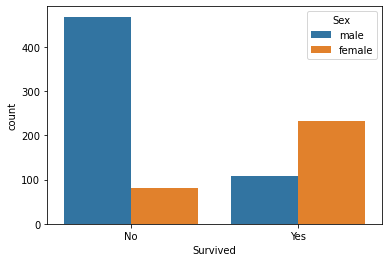

In [11]:
sns.countplot(x='Survived',hue='Sex',data=data)

From this plot, we can see clearly that there were a higher number of female survivors on the Titanic than male.

# relation between Sex ,Age and Pclass on the survivors

C:\Users\Pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


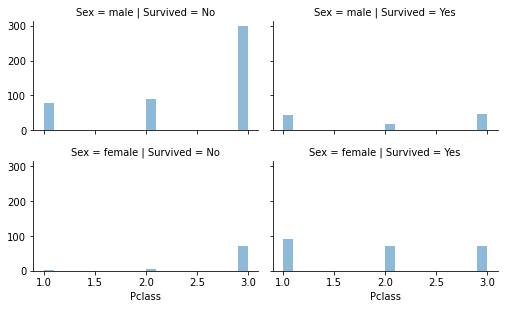

In [13]:
grid=sns.FacetGrid(data, col='Survived',row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, "Pclass", alpha=.5, bins=20)
grid.add_legend()

we can conclude form the histogram above that the number of female survived is higher than male's and that the passengers in the first class were a higher number of female survivors

# Relation between Pclass, age and Survived

In [14]:
data["Survived"]

0       No
1       No
2       No
3       No
4       No
      ... 
886    Yes
887     No
888     No
889     No
890    Yes
Name: Survived, Length: 891, dtype: object

<AxesSubplot:xlabel='Pclass', ylabel='count'>

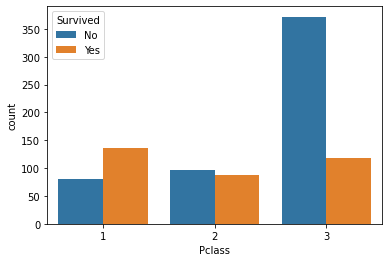

In [15]:
sns.countplot(x='Pclass',hue='Survived',data=data)


From the plots above, we can see that passengers in the third class 
were far less likely to survive than passengers in the first and second class.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

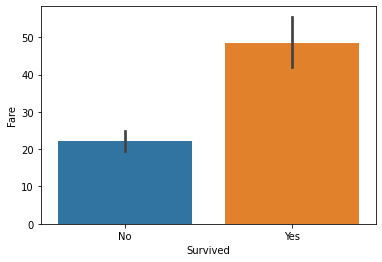

In [16]:
sns.barplot(x='Survived',y="Fare",data=data)


It can be observed that passengers who paid higher fares were much more likely to survive than passengers who did not.

In [18]:
def plot_correlation_map( df ):
    corr = df.corr()
    cmap = sns.diverging_palette(220,10, as_cmap=True)
    s = sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={'shrink':.9}, ax = ax, annot=True, annot_kws={'fontsize' : .12})
    return plot_correlation_map



In [19]:
data.drop(['Name'], axis = 1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,male,28.000000,0,0,248740,13.0000,B96 B98,S
1,76,No,3,male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,male,20.000000,0,0,350050,7.8542,B96 B98,S
3,568,No,3,female,29.000000,0,4,349909,21.0750,B96 B98,S
4,672,No,1,male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.000000,1,0,237736,30.0708,B96 B98,C
887,61,No,3,male,22.000000,0,0,2669,7.2292,B96 B98,C
888,535,No,3,female,30.000000,0,0,315084,8.6625,B96 B98,S
889,102,No,3,male,29.699118,0,0,349215,7.8958,B96 B98,S


# create a new column called Title

In [20]:
import re
def get_title(name):
   
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

data["Title"] = data["Name"].apply(get_title)

# Correlation between title and age

In [21]:
print(data[['Age','Title']].groupby(['Title']).mean())

                Age
Title              
Capt      70.000000
Col       58.000000
Countess  33.000000
Don       40.000000
Dr        40.242731
Jonkheer  38.000000
Lady      48.000000
Major     48.500000
Master     7.086662
Miss      23.341584
Mlle      24.000000
Mme       24.000000
Mr        31.753762
Mrs       35.055080
Ms        28.000000
Rev       43.166667
Sir       49.000000


# Relation between SibSp and Survived

In [22]:
data[["SibSp", "Survived"]].groupby(['Survived'], as_index=False).mean()

,Survived,SibSp
0,No,0.553734
1,Yes,0.473684


# title_dictionary

In [23]:
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royal",
                        "Don":        "Royal",
                        "Sir" :       "Royal",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "Countess":   "Royal",
                        "Dona":       "Royal",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royal"

                    
}

# Correlation between dictionary_title and age

# relation between title and fare

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

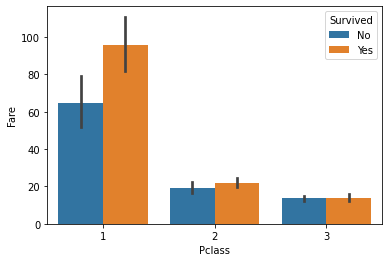

In [24]:
data['Pclass']
sns.barplot(data=data, x='Pclass', y='Fare', hue ='Survived')


From the visualization above, we can observe that passengers of the first class had the chance to survive much more than those of 2nd and 3rd class.


# Creation of Familysize 

In [25]:
data["FamilySize"] = data["Parch"] + data["SibSp"]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S,Mr,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S,Mr,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs,4
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,1


<AxesSubplot:xlabel='FamilySize', ylabel='Fare'>

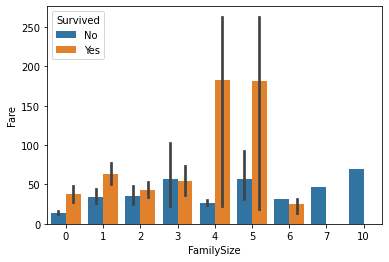

In [26]:
sns.barplot(data=data, x='FamilySize', y='Fare', hue ='Survived')


It can be concluded that families how has 4 and 5 members and how has paid high for fare more likely to survive than others.

<AxesSubplot:>

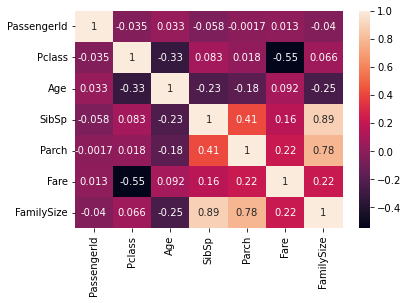

In [27]:
cor = data.corr()
sns.heatmap(cor, annot=True)

We can observe that The variables ‘SibSp’ and ‘Parch’ seem to have a positive correlation.
The variables ‘Fare’ and ‘Survived’ also seems to have a positive correlation.